# Model 10

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import numpy as np

In [2]:
model_df = pd.read_csv("status.csv")
model_df.head()

,hypertension,heart_disease,diabetes,problematic,gender,smoking_history_No Info,smoking_history_current,smoking_history_not current,age,bmi,HbA1c_level,blood_glucose_level
0,0,1,0,0,0,0.0,0.0,1.0,1.000000,-0.645658,0.127273,-0.454545
1,0,0,0,0,0,1.0,0.0,0.0,0.349349,-0.595938,0.127273,-1.000000
2,0,0,0,0,1,0.0,0.0,1.0,-0.301301,-0.595938,-0.200000,-0.290909
3,0,0,0,0,0,0.0,1.0,0.0,-0.101101,-0.686275,-0.454545,-0.318182
4,1,1,0,0,1,0.0,1.0,0.0,0.899900,-0.763539,-0.527273,-0.318182


In [3]:
# Define features (X) and target (y)
X = model_df.drop("diabetes",axis=1)
y = model_df["diabetes"]

In [4]:
# Split dataset into train and test sets (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)
X_train.shape,X_test.shape

((89983, 11), (9999, 11))

In [5]:
# One-hot encode target labels (diabetes: 0 or 1 → [1,0] or [0,1])
encoder = OneHotEncoder(sparse_output=False, drop=None)
y_train_encoded = encoder.fit_transform(y_train.to_frame())
y_test_encoded = encoder.transform(y_test.to_frame())
y_train_encoded, y_test_encoded

(array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]))

In [6]:
# Build a neural network model 
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(2, activation='softmax'))

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])
model.summary()

# Train the model with early stopping to prevent overfitting
h = model.fit(
    X_train, y_train_encoded,
    epochs=200,
    batch_size=128, 
    validation_data=(X_test, y_test_encoded),
    callbacks=[EarlyStopping(monitor='val_loss', patience=15)],
    verbose=1 
)

/Users/durudemirbag/miniforge3/envs/tf/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-23 22:16:04.122145: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-08-23 22:16:04.122216: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-08-23 22:16:04.122240: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-08-23 22:16:04.122259: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-23 22:16:04.122277: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:27

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,434 (103.26 KB)

 Trainable params: 26,434 (103.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


2025-08-23 22:16:04.726149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


703/703 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9576 - loss: 0.1227 - val_accuracy: 0.9698 - val_loss: 0.0959
Epoch 2/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9692 - loss: 0.0954 - val_accuracy: 0.9708 - val_loss: 0.0926
Epoch 3/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9698 - loss: 0.0883 - val_accuracy: 0.9732 - val_loss: 0.0885
Epoch 4/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9710 - loss: 0.0868 - val_accuracy: 0.9737 - val_loss: 0.0847
Epoch 5/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9715 - loss: 0.0853 - val_accuracy: 0.9721 - val_loss: 0.0838
Epoch 6/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9714 - loss: 0.0860 - val_accuracy: 0.9713 - val_loss: 0.0859
Epoch 7/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9723 - loss: 0.0854 - val_accuracy: 0.9737 - val_loss: 0.0808
Epoch 8/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9714 - loss: 0.0845 - val_

In [7]:
# Plot training vs validation accuracy and loss across epochs
def LossHistory (history):
    # Accuracy 
    plt.figure(figsize=(8,4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss 
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

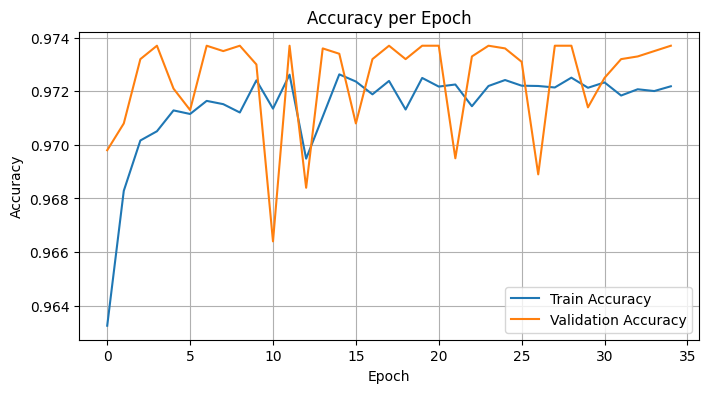

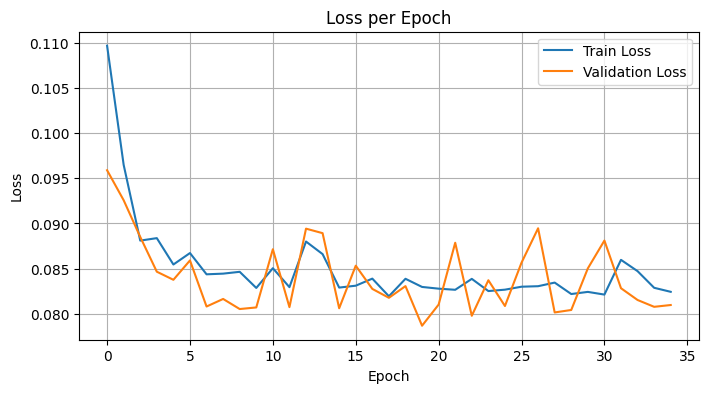

In [8]:
LossHistory(h)

In [9]:
# Evaluate model performance on train set
y_pred_prob_train = model.predict(X_train)
y_pred_train = np.argmax(y_pred_prob_train, axis=1)
y_true_train = np.argmax(y_train_encoded, axis=1)

print(classification_report(y_true_train, y_pred_train))

2812/2812 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     82333
           1       0.99      0.68      0.81      7650

    accuracy                           0.97     89983
   macro avg       0.98      0.84      0.90     89983
weighted avg       0.97      0.97      0.97     89983



In [10]:
# Evaluate model performance on test set
y_pred_prob_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_prob_test, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

print(classification_report(y_true, y_pred_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9149
           1       0.99      0.70      0.82       850

    accuracy                           0.97      9999
   macro avg       0.98      0.85      0.90      9999
weighted avg       0.97      0.97      0.97      9999



In [11]:
# Generate confusion matrix to evaluate classification results
cm = confusion_matrix(y_true, y_pred_test)
cm

array([[9145,    4],
       [ 259,  591]])

In [12]:
# Generate confusion matrix to evaluate classification results
cm = confusion_matrix(y_true, y_pred_test)
cm

array([[9145,    4],
       [ 259,  591]])

In [13]:
# AUC calculation
# y_pred_prob[:,1] = predicted probability for class 1(diabetes)
auc = roc_auc_score(y_true, y_pred_prob_test[:, 1])
print("AUC score:", auc)

AUC score: 0.9761850539756837
